# hw02

## 1. 计算1^2+2^2+......+10^2

In [1]:
s = 0
for i in range(10):
    s += (i+1)**2
s

385

## 2. 一个期限为两年的项目，初始投资为2000美元，预期在第1年年末产生800美元收益，第2年年末产生1600收益投资，计算该项目的内部收益率IRR

In [2]:
import numpy as np

In [3]:
np.irr([-2000, 800, 1600])

0.11651513899116828

## 3. 某人贷款20000元购买汽车，年利率为6%，他需要在5年内进行每月的分期付款，问他每个月需要支付多少钱 

In [4]:
np.pmt(0.06/12, 5*12, 20000)

-386.6560305885654

# hw03

## 对数据集d-aapl0305.txt绘制折线图与蜡烛图 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.finance as mpf
%matplotlib inline

In [22]:
quotes = pd.read_csv('d-aapl0305.txt', sep='\s')

C:\Users\ian\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [23]:
quotes.head()

,Open,High,Low,Close,Volumn,AdjClose
0,14.80,14.93,14.59,14.90,5266200,7.42
1,15.03,15.38,14.88,14.90,13947600,7.42
2,14.79,15.00,14.47,14.85,12226600,7.39
3,14.58,14.71,14.44,14.55,8201600,7.24
4,14.62,14.92,14.50,14.68,7687600,7.31


## 折线图

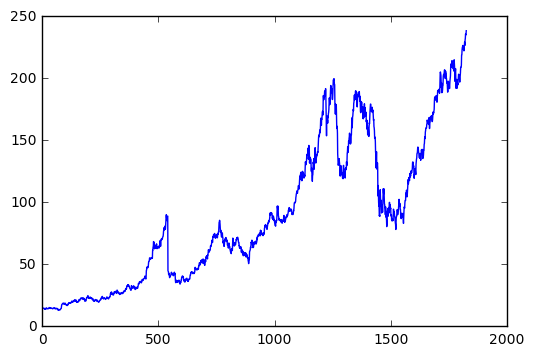

In [24]:
plt.plot(quotes['Close'])

## 蜡烛图

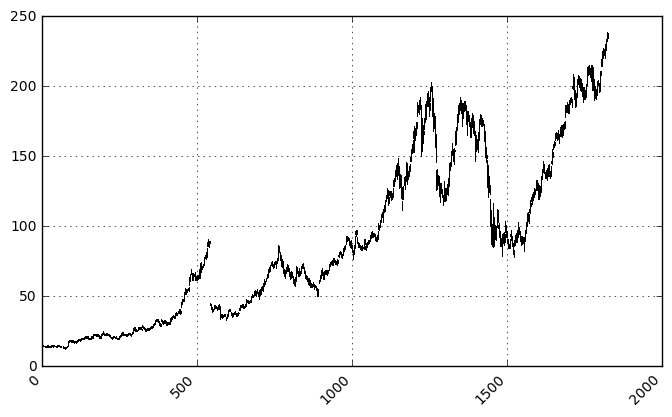

In [25]:
fig, ax = plt.subplots(figsize=(8, 5)) #设置图片大小
fig.subplots_adjust(bottom=0.2)
mpf.candlestick2_ochl(ax, opens=quotes["Open"].values, closes=quotes["Close"].values,
                 highs=quotes["High"].values, lows=quotes["Low"].values, width=0.6, colorup='b', colordown='r')
plt.grid(True)
# ax.xaxis.set_major_formatter(ticker.FuncFormatter(mydate_formatter))
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()




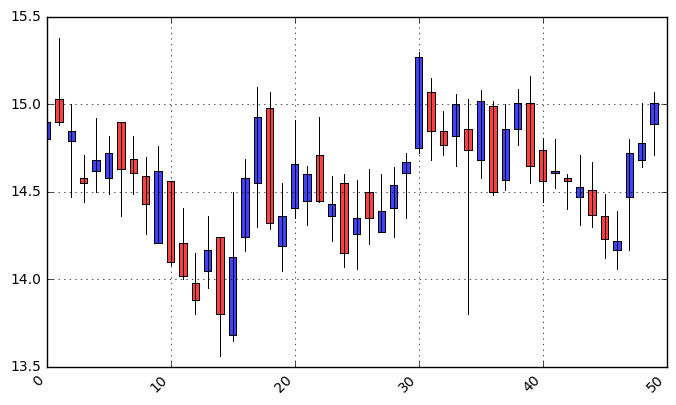

In [26]:
quotes = quotes.iloc[:50]
fig, ax = plt.subplots(figsize=(8, 5)) #设置图片大小
fig.subplots_adjust(bottom=0.2)
mpf.candlestick2_ochl(ax, opens=quotes["Open"].values, closes=quotes["Close"].values,
                 highs=quotes["High"].values, lows=quotes["Low"].values, width=0.6, colorup='b', colordown='r')
plt.grid(True)
# ax.xaxis.set_major_formatter(ticker.FuncFormatter(mydate_formatter))
plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()




# hw04

 获取苹果公司从2014年1月1日到今天的股票数据

为了更加切合实际，选取的是sh510300ETF近3年的数据

## 1）画出股票数据的折线图

In [7]:
import requests
import json
import os
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 100)  # 设置显示数据的最大列数，防止出现省略号…，导致数据显示不全
pd.set_option('expand_frame_repr', False)  # 当列太多时不自动换行
import matplotlib.pyplot as plt
%matplotlib inline
# 支持中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

In [1]:
def get_hist_k_data(code, datalen, verbose=False, plot=False):
    r = requests.get('http://money.finance.sina.com.cn/quotes_service/api/json_v2.php/CN_MarketData.getKLineData?symbol={}&scale=240&ma=no&datalen={}'.format(code, datalen))
    rs = r.text
    cols_num = ['open', 'high', 'low', 'close']
    cols = ['day', 'volume'] + cols_num
    for c in cols:
        rs = rs.replace(c, '"{}"'.format(c))
    df1 = pd.DataFrame(json.loads(rs))
    df1.loc[:, cols_num] = df1.loc[:, cols_num].applymap(float)
    df1.loc[:, 'day'] = pd.to_datetime(df1.day)
    df1.index = df1.day
    if verbose:
        print(df1.head(2))
        print(df1.tail(2))
    if plot:
        df1.close.plot()
        
    return df1

In [2]:
code = 'sh510300'
datalen = 250*3

            close        day   high    low   open    volume
day                                                        
2017-01-11  3.386 2017-01-11  3.422  3.385  3.405  94705340
2017-01-12  3.369 2017-01-12  3.395  3.366  3.386  84000935
            close        day   high    low   open     volume
day                                                         
2020-02-12  3.971 2020-02-12  3.977   3.93  3.939  290783451
2020-02-13   3.95 2020-02-13  3.985  3.938   3.97  325961046


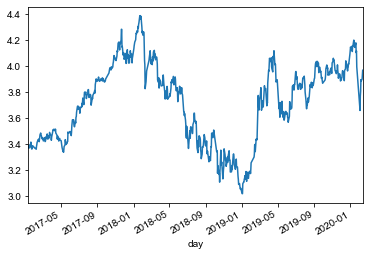

In [5]:
df = get_hist_k_data(code, datalen, True, True)

## 2）计算对数收益率



In [24]:
df['log_return'] = (df.close/df.close.shift(1)).map(np.log)

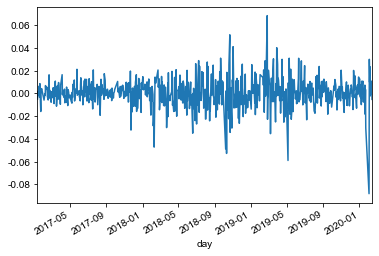

In [25]:
df.log_return.plot()

## 3）计算历史波动率

In [28]:
df['波动率'] = df.log_return.rolling(252).std()/np.sqrt(252)

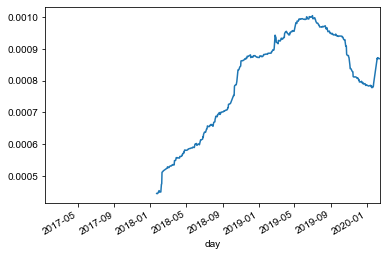

In [29]:
df.波动率.plot()

# lesson5

## hw05

### 计算以下定积分
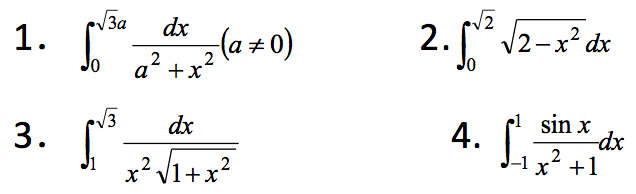

In [14]:
import sympy as sy

x = sy.Symbol('x')
a = sy.Symbol('a')

#### 1

In [54]:
f = 1/(a**2+x**2)

In [55]:
int_func = sy.integrate(f, x)
print(sy.pretty(int_func))

  ⅈ⋅log(-ⅈ⋅a + x)   ⅈ⋅log(ⅈ⋅a + x)
- ─────────────── + ──────────────
         2                2       
──────────────────────────────────
                a                 


In [56]:
Fb = int_func.subs(x, np.sqrt(3)*a).evalf()
Fa = int_func.subs(x, 0).evalf()

Fb - Fa  # exact value of integral

-(-0.5*I*log(-I*a) + 0.5*I*log(I*a))/a + (-0.5*I*log(1.73205080756888*a - I*a) + 0.5*I*log(1.73205080756888*a + I*a))/a

#### 2

In [47]:
f = sy.sqrt(2-x**2)

In [48]:
print(sy.pretty(sy.Integral(f, (x, 0, sy.sqrt(2)))))

√2                 
⌠                  
⎮     __________   
⎮    ╱    2        
⎮  ╲╱  - x  + 2  dx
⌡                  
0                  


In [49]:
int_func = sy.integrate(f, x)
print(sy.pretty(int_func))

     __________             
    ╱    2                  
x⋅╲╱  - x  + 2        ⎛√2⋅x⎞
─────────────── + asin⎜────⎟
       2              ⎝ 2  ⎠


In [50]:
Fb = int_func.subs(x, np.sqrt(2)).evalf()
Fa = int_func.subs(x, 0).evalf()

Fb - Fa  # exact value of integral

1.5707963267949 + 3.2085909082121e-9*I

#### 3

In [60]:
f = 1/(x**2*sy.sqrt(1+x**2))

In [61]:
print(sy.pretty(sy.Integral(f, (x, 1, sy.sqrt(3)))))

√3                  
⌠                   
⎮        1          
⎮  ────────────── dx
⎮        ________   
⎮   2   ╱  2        
⎮  x ⋅╲╱  x  + 1    
⌡                   
1                   


In [62]:
int_func = sy.integrate(f, x)
print(sy.pretty(int_func))

      ________
     ╱     1  
-   ╱  1 + ── 
   ╱        2 
 ╲╱        x  


In [65]:
Fb = int_func.subs(x, np.sqrt(3)).evalf()
Fa = int_func.subs(x, 1).evalf()

Fb - Fa  # exact value of integral

0.259513023993843

#### 4

In [69]:
f = sy.sin(x)/(x**2+1)

In [70]:
print(sy.pretty(sy.Integral(f, (x, -1, 1))))

1           
⌠           
⎮  sin(x)   
⎮  ────── dx
⎮   2       
⎮  x  + 1   
⌡           
-1          


In [71]:
int_func = sy.integrate(f, x)
print(sy.pretty(int_func))

⌠          
⎮ sin(x)   
⎮ ────── dx
⎮  2       
⎮ x  + 1   
⌡          


In [72]:
Fb = int_func.subs(x, 1).evalf()
Fa = int_func.subs(x, -1).evalf()

Fb - Fa  # exact value of integral

-Integral(sin(x)/(x**2 + 1), (x, -1)) + Integral(sin(x)/(x**2 + 1), (x, 1))

### 设投资者的初始资金为1000元，效用函数为$u(w)=\sqrt{w}$。现想投资两种证券A和B，证券A和证券b的现在价格分别是8元和10元。假设一年后，在状态u下，证券A的价格为15元，证券B的价格为12元；在状态d下，证券A的价格为10元，证券B的价格为15元。问两种证券应该分别购买多少，才能使得一年后的预期效用函数最大化？

# hw06

 数据集：第4周的stock_px.csv

## 1. 计算苹果公司每天的简单收益率和对数收益率


In [90]:
import statsmodels.api as sm
import scipy.stats as scs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# 支持中文显示
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
plt.rcParams['axes.unicode_minus'] = False

In [74]:
df = pd.read_csv('data/stock_px.csv')
df.head()

,Unnamed: 0,AAPL,MSFT,XOM,SPX
0,2003-01-02 00:00:00,7.40,21.11,29.22,909.03
1,2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2,2003-01-06 00:00:00,7.45,21.52,29.96,929.01
3,2003-01-07 00:00:00,7.43,21.93,28.95,922.93
4,2003-01-08 00:00:00,7.28,21.31,28.83,909.93


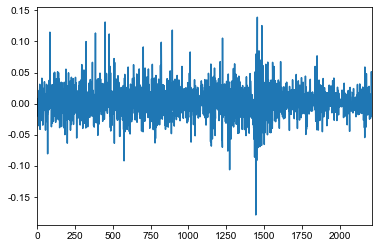

In [81]:
# 简单收益率
r_simple = (df.AAPL-df.AAPL.shift(1))/df.AAPL.shift(1)
r_simple.plot()

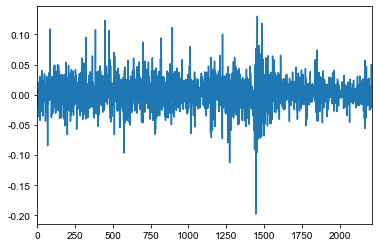

In [82]:
r_log = np.log(df.AAPL/df.AAPL.shift(1))
r_log.plot()

## 2. 检验苹果公司 两个收益率的正态性

In [96]:
def normality_tests(arr):
    ''' Tests for normality distribution of given data set.
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    print("Skew of data set  %14.3f" % scs.skew(arr))
    print("Skew test p-value %14.3f" % scs.skewtest(arr)[1])
    print("Kurt of data set  %14.3f" % scs.kurtosis(arr))
    print("Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1])
    print("Norm test p-value %14.3f" % scs.normaltest(arr)[1])
    

In [97]:
normality_tests(r_simple.dropna().values)

Skew of data set           0.195
Skew test p-value          0.000
Kurt of data set           3.968
Kurt test p-value          0.000
Norm test p-value          0.000


Text(0, 0.5, 'sample quantiles')

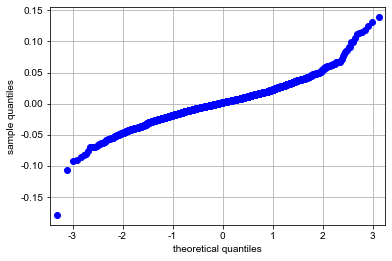

In [87]:
#正态性检验
sm.qqplot(r_simple, line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

Text(0, 0.5, 'sample quantiles')

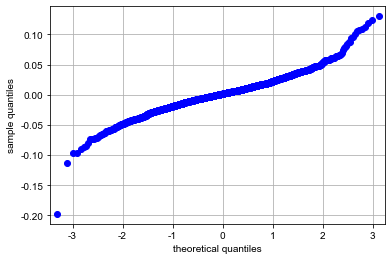

In [86]:
#正态性检验
sm.qqplot(r_log, line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

In [95]:

normality_tests(r_log.dropna().values)

Skew of data set          -0.028
Skew test p-value          0.584
Kurt of data set           4.285
Kurt test p-value          0.000
Norm test p-value          0.000


In [94]:
r_log.dropna().values

array([ 0.00673403,  0.        , -0.00268817, ...,  0.00473533,
        0.01539593,  0.03268477])

## 3. 检验苹果公司股价和对数股价的正态性 

In [99]:
df['AAPL_log'] = np.log(df.AAPL)

In [100]:
normality_tests(df.AAPL.values)

Skew of data set           0.891
Skew test p-value          0.000
Kurt of data set          -0.202
Kurt test p-value          0.036
Norm test p-value          0.000


In [101]:
normality_tests(df['AAPL_log'].values)

Skew of data set          -0.566
Skew test p-value          0.000
Kurt of data set          -0.796
Kurt test p-value          0.000
Norm test p-value          0.000


# lesson07

In [2]:
!pip install pandas_datareader

In [5]:
#数据
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
get_ipython().magic(u'matplotlib inline')

In [10]:
data = pd.read_csv('data/stock_px.csv', index_col=0)

In [11]:
data.head()

,AAPL,MSFT,XOM,SPX
2003-01-02 00:00:00,7.40,21.11,29.22,909.03
2003-01-03 00:00:00,7.45,21.14,29.24,908.59
2003-01-06 00:00:00,7.45,21.52,29.96,929.01
2003-01-07 00:00:00,7.43,21.93,28.95,922.93
2003-01-08 00:00:00,7.28,21.31,28.83,909.93


In [12]:
symbols = data.columns.tolist()
noa = len(symbols)

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


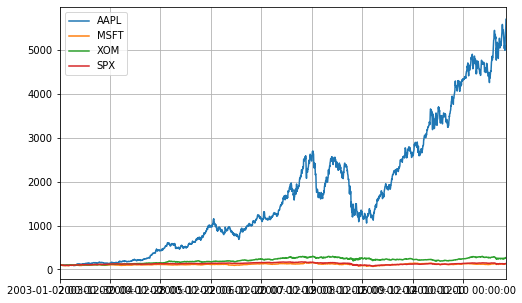

In [13]:
(data / data.ix[0] * 100).plot(figsize=(8, 5), grid=True)

In [14]:
rets = np.log(data / data.shift(1))

In [16]:
rets.mean() * 252  # 年化收益

AAPL    0.460447
MSFT    0.029156
XOM     0.111967
SPX     0.033931
dtype: float64

In [17]:
rets.cov() * 252  # 协方差

,AAPL,MSFT,XOM,SPX
AAPL,0.150288,0.048609,0.039699,0.047065
MSFT,0.048609,0.078788,0.039356,0.042821
XOM,0.039699,0.039356,0.070137,0.043358
SPX,0.047065,0.042821,0.043358,0.045852


## 随机初始化组合权重

In [18]:
#基本理论
weights = np.random.random(noa)
weights /= np.sum(weights)

weights

array([0.4241986 , 0.32889275, 0.00314559, 0.24376306])

In [19]:
np.sum(rets.mean() * weights) * 252  # 组合年化收益

0.2135333745618022

In [20]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))  # 组合年化方差

0.06870799065387012

In [21]:
np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))  # 组合年化标准差

0.26212209112142787

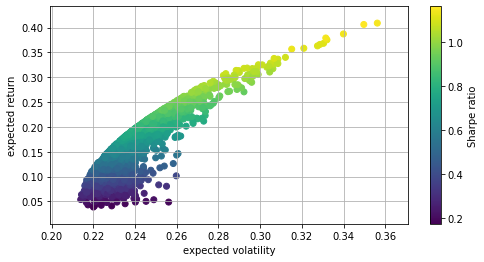

In [22]:
prets = []
pvols = []
for p in range (2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, 
                        np.dot(rets.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets, c=prets / pvols, marker='o')
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [23]:
#投资组合优化
def statistics(weights,rf=0):
    ''' Return portfolio statistics.
    
    Parameters
    ==========
    weights : array-like
        weights for different securities in portfolio
    
    Returns
    =======
    pret : float
        expected portfolio return
    pvol : float
        expected portfolio volatility
    pret / pvol : float
        Sharpe ratio for rf=0
    '''
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([pret, pvol, (pret-rf) / pvol])

import scipy.optimize as sco

def min_func_sharpe(weights):
    return -statistics(weights)[2]

cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

bnds = tuple((0, 1) for x in range(noa))

noa * [1. / noa,]  # 初始化 每个股票的权重 平均

[0.25, 0.25, 0.25, 0.25]

In [25]:
get_ipython().run_cell_magic(u'time', u'', \
                             u"opts = sco.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP',\n  bounds=bnds, constraints=cons)")

CPU times: user 33.9 ms, sys: 1.83 ms, total: 35.7 ms
Wall time: 35.1 ms


In [28]:
opts = sco.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP', bounds=bnds, constraints=cons)

In [29]:
opts

     fun: -1.1877296178944798
     jac: array([0.        , 0.30894965, 0.02492526, 0.2844273 ])
 message: 'Optimization terminated successfully.'
    nfev: 12
     nit: 2
    njev: 2
  status: 0
 success: True
       x: array([1.00000000e+00, 1.11022302e-16, 0.00000000e+00, 1.66533454e-16])

In [30]:
opts['x'].round(3)

array([1., 0., 0., 0.])

In [31]:
statistics(opts['x']).round(3)  # array([0.46 , 0.388, 1.188])  收益，标准差，超额收益

array([0.46 , 0.388, 1.188])

In [32]:
def min_func_variance(weights):
    return statistics(weights)[1] ** 2

optv = sco.minimize(min_func_variance, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

optv

     fun: 0.04539102033796768
     jac: array([0.09308977, 0.09067946, 0.09074876, 0.09079515])
 message: 'Optimization terminated successfully.'
    nfev: 60
     nit: 10
    njev: 10
  status: 0
 success: True
       x: array([0.        , 0.07839977, 0.08700112, 0.83459911])

In [33]:
statistics(optv['x']).round(3)

array([0.04 , 0.213, 0.189])

In [34]:
#有效边界
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)

def min_func_port(weights):
    return statistics(weights)[1]

In [36]:
trets = np.linspace(0.0, 0.25, 50)
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

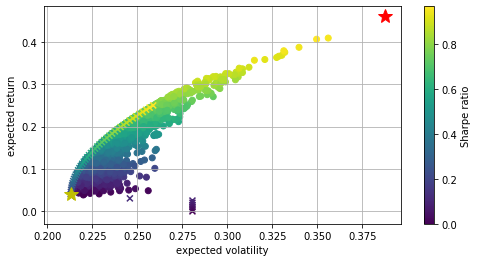

In [37]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets,
            c=prets / pvols, marker='o')
            # random portfolio composition
plt.scatter(tvols, trets,
            c=trets / tvols, marker='x')
            # efficient frontier
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
         'r*', markersize=15.0)
            # portfolio with highest Sharpe ratio
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],
         'y*', markersize=15.0)
            # minimum variance portfolio
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [38]:
#资本市场线
import scipy.interpolate as sci

ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

tck = sci.splrep(evols, erets)

def f(x):
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)
def df(x):
    ''' First derivative of efficient frontier function. '''
    return sci.splev(x, tck, der=1)

def equations(p, rf=0.01):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

opt = sco.fsolve(equations, [0.01, 0.5, 0.15])

opt

array([0.01      , 1.07417652, 0.30562936])

In [39]:
np.round(equations(opt), 6)

array([ 0., -0.,  0.])

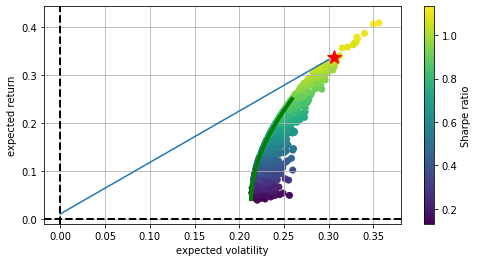

In [40]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets,
            c=(prets - 0.01) / pvols, marker='o')
            # random portfolio composition
plt.plot(evols, erets, 'g', lw=4.0)
            # efficient frontier
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, lw=1.5)
            # capital market line
plt.plot(opt[2], f(opt[2]), 'r*', markersize=15.0) 
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')


In [41]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - f(opt[2])},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

res['x'].round(3)

array([0.649, 0.   , 0.351, 0.   ])